In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from bs4 import BeautifulSoup as soup
from requests import get
import pandas as pd 
import requests
import re

print(1729)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['figure.dpi'] = 140
plt.rcParams['savefig.dpi'] = 140
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

1729


In [ ]:
page=('https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1')
response = requests.get(page)
title = []
desc = []
votes = []
spec = []
links = []

In [ ]:
%%time 

page_no = 0
for i in range(97):
    
    url = 'https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_getr_d_paging_btm_next_' + str(i+1) + '?ie=UTF8&reviewerType=all_reviews&pageNumber=' + str(i+1)

    r = requests.get(url)
    page_html = soup(r.text, 'html.parser') 

    reviews = page_html.find_all("div",class_="a-section review aok-relative")

    for data in reviews:

        title_= data.find_all("a",class_="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold")
        for i in title_:
            d = i.text
            title.append(d)

        desc_ = data.find_all("span",class_="a-size-base review-text review-text-content")
        for i in desc_:
            d=i.text
            desc.append(d)

        votes_ = data.find_all("span",class_="a-size-base a-color-tertiary cr-vote-text")
        for i in votes_:
            d=i.text
            votes.append(d)

        spec_ = data.find_all("a",class_="a-size-mini a-link-normal a-color-secondary")
        for i in spec_:
            d=i.text
            spec.append(d) 

CPU times: user 8.49 s, sys: 156 ms, total: 8.65 s
Wall time: 1min


In [ ]:
df = pd.DataFrame()
df["Review"] = title
df["Desc"] = desc
df

,Review,Desc
0,\nDamaged product received\n,\nThere was a hairline scratch on the screen w...
1,\nDo not purchase this I phone\n,\nThis product is duplicate of iPhone 12 only ...
2,\n😂😂😂😂\n,\nYou should be a bigggggg bot to buy this pho...
3,\nExcellent upgrade in context of being 90k po...,\nJust but iphone 12!It’s not worth the money!...
4,\ntrash af\n,\ni am poor and i cant afford it lmao xdxdxdxd...
...,...,...
479,\nIphone 13 256\n,\nIphone 13 256 gb variant purchased from reli...
480,\nBest seller\n,\nToday i received iphone 13 . all's are good ...
481,\nTampered brand sealed\n,"\nI will check with apple store, if shipment f..."
482,\nGreAt\n,


In [ ]:
df["Desc"] = df["Desc"].str.replace("\n","")
df["Desc"]

0      There was a hairline scratch on the screen whi...
1      This product is duplicate of iPhone 12 only ca...
2      You should be a bigggggg bot to buy this phone...
3      Just but iphone 12!It’s not worth the money!Un...
4      i am poor and i cant afford it lmao xdxdxdxdxd...
                             ...                        
479    Iphone 13 256 gb variant purchased from relian...
480    Today i received iphone 13 . all's are good an...
481    I will check with apple store, if shipment fou...
482                                                     
483                    On right side it has h small dent
Name: Desc, Length: 484, dtype: object

In [ ]:
temp = df["Desc"].copy()
temp

0      There was a hairline scratch on the screen whi...
1      This product is duplicate of iPhone 12 only ca...
2      You should be a bigggggg bot to buy this phone...
3      Just but iphone 12!It’s not worth the money!Un...
4      i am poor and i cant afford it lmao xdxdxdxdxd...
                             ...                        
479    Iphone 13 256 gb variant purchased from relian...
480    Today i received iphone 13 . all's are good an...
481    I will check with apple store, if shipment fou...
482                                                     
483                    On right side it has h small dent
Name: Desc, Length: 484, dtype: object

In [ ]:
!pip install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk 
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize

text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['Nick', 'likes', 'play', 'football', ',', 'fond', 'tennis', '.']


In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [ ]:
from nltk.stem.porter import *
porterStemmer = PorterStemmer()

In [ ]:
# Working example 1
%%time
from nltk.tokenize import RegexpTokenizer
tokens_without_sw_1 = []
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(temp)):
    text =  temp[i].replace(",","")
    text_tokens = tokenizer.tokenize(text)
    tokens_without_sw_1.append([ word for word in text_tokens if not word in stopwords.words()])

CPU times: user 1min 14s, sys: 6.56 s, total: 1min 20s
Wall time: 1min 27s


In [ ]:
#temp[:1]
print(tokens_without_sw_1[1][:30])

['This', 'product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone']


In [ ]:
# Working example 2
%%time
from nltk.tokenize import RegexpTokenizer
tokens_without_sw_2 = []
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(temp)):
    text =  temp[i].replace(",","")
    text_tokens = tokenizer.tokenize(text)
    tokens_without_sw_2.append([ porterStemmer.stem(word) for word in text_tokens if not word in stopwords.words()])

CPU times: user 1min 7s, sys: 5.25 s, total: 1min 12s
Wall time: 1min 12s


In [ ]:
#temp[:5]
print(tokens_without_sw_2[1][:30])

['thi', 'product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone']


In [ ]:
# Working example 3
%%time
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

tokens_without_sw_3 = []
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(temp)):
    # text =  temp[i].replace(",","")
    # text_tokens = tokenizer.tokenize(text)
    # tokens_without_sw_3.append([ snowBallStemmer.stem(word) for word in text_tokens if not word in stopwords.words()])
    wordList = nltk.word_tokenize(temp[i])

    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    tokens_without_sw_3.append(stemWords)

CPU times: user 320 ms, sys: 2.07 ms, total: 322 ms
Wall time: 326 ms


In [ ]:
' '.join(tokens_without_sw_2[0])

'there hairlin scratch screen visibl directli when contact amazon replac ask connect appl connect appl ask connect amazon blame game begin pay price awful servic i tag social media amazon appl such big scam'

In [ ]:
# We will reprocess again using
# Working example 2
%%time
tokenizer = RegexpTokenizer(r'\w+')
tokens_without_sw_2_1 = []
for i in range(len(tokens_without_sw_2)):
    text =  ' '.join(tokens_without_sw_2[i])
    text_tokens = tokenizer.tokenize(text)
    tokens_without_sw_2_1.append([ porterStemmer.stem(word) for word in text_tokens if not word in stopwords.words()])

CPU times: user 35.5 s, sys: 2.87 s, total: 38.4 s
Wall time: 39.3 s


In [ ]:
print(temp[0])
print([ porterStemmer.stem(word) for word in tokenizer.tokenize(temp[0].replace(",","")) if not word in stopwords.words()])

print(tokens_without_sw_1[0][:10])
print(tokens_without_sw_2[0][:10])
print(tokens_without_sw_3[0][:10])

print(tokens_without_sw_2_1[0][:10])


There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam
['there', 'hairlin', 'scratch', 'screen', 'visibl', 'directli', 'when', 'contact', 'amazon', 'replac', 'ask', 'connect', 'appl', 'connect', 'appl', 'ask', 'connect', 'amazon', 'blame', 'game', 'begin', 'pay', 'price', 'awful', 'servic', 'i', 'tag', 'social', 'media', 'amazon', 'appl', 'such', 'big', 'scam']
['There', 'hairline', 'scratch', 'screen', 'visible', 'directly', 'When', 'contacting', 'Amazon', 'replacement']
['there', 'hairlin', 'scratch', 'screen', 'visibl', 'directli', 'when', 'contact', 'amazon', 'replac']
['there', 'was', 'a', 'hairlin', 'scratch', 'on', 'the', 'screen', 'which', 'is']
['hairlin', 'scra

In [ ]:
# We will go with 2 (tokens_without_sw_2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
 Document2 , 
 Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [ ]:
analyze = vectorizer.build_analyzer()
print("Document 1",analyze(Document1))
print("‘Document 2’",analyze(Document2))
print("‘Document 3’",analyze(Document3))

Document 1 ['it', 'is', 'going', 'to', 'rain', 'today']
‘Document 2’ ['today', 'am', 'not', 'going', 'outside']
‘Document 3’ ['am', 'going', 'to', 'watch', 'the', 'season', 'premiere']


In [ ]:
X = vectorizer.fit_transform(Doc)
print(vectorizer.get_feature_names_out())

['am' 'going' 'is' 'it' 'not' 'outside' 'premiere' 'rain' 'season' 'the'
 'to' 'today' 'watch']


In [ ]:
import pprint 

print("‘Document transform’",X.toarray())
xyz= pd.DataFrame(X.toarray())
print()
print()
xyz.columns = ['am','going','is','it','not','outside','premiere','rain','season','the','to','today','watch']
print(xyz)
Doc

‘Document transform’ [[0.         0.27824521 0.4711101  0.4711101  0.         0.
  0.         0.4711101  0.         0.         0.35829137 0.35829137
  0.        ]
 [0.40619178 0.31544415 0.         0.         0.53409337 0.53409337
  0.         0.         0.         0.         0.         0.40619178
  0.        ]
 [0.32412354 0.25171084 0.         0.         0.         0.
  0.4261835  0.         0.4261835  0.4261835  0.32412354 0.
  0.4261835 ]]


         am     going       is       it       not   outside  premiere  \
0  0.000000  0.278245  0.47111  0.47111  0.000000  0.000000  0.000000   
1  0.406192  0.315444  0.00000  0.00000  0.534093  0.534093  0.000000   
2  0.324124  0.251711  0.00000  0.00000  0.000000  0.000000  0.426184   

      rain    season       the        to     today     watch  
0  0.47111  0.000000  0.000000  0.358291  0.358291  0.000000  
1  0.00000  0.000000  0.000000  0.000000  0.406192  0.000000  
2  0.00000  0.426184  0.426184  0.324124  0.000000  0.426184  


['It is going to rain today.',
 'Today I am not going outside.',
 'I am going to watch the season premiere.']

In [ ]:
# Finding count of each word
%%time
answer = dict()
cnt = 0
for i in tokens_without_sw_2:
    for j in i:
        cnt = cnt + 1
        if j not in answer:
            answer[j] = 1
        else:
            answer[j] = answer[j] + 1

CPU times: user 6.31 ms, sys: 0 ns, total: 6.31 ms
Wall time: 6.58 ms


In [ ]:
print(cnt)
print(len(answer))

7486
1666


In [ ]:
answer_sorted = {k: v for k, v in sorted(answer.items(),reverse=True, key=lambda item: item[1])}
print(answer_sorted)

{'i': 266, 'phone': 232, 'iphon': 227, 'batteri': 149, 'camera': 133, 'appl': 100, 'the': 99, 'product': 85, 'qualiti': 84, 'life': 82, '13': 82, 'android': 77, 'buy': 65, 'great': 63, 'amazon': 60, 'time': 50, 'display': 49, 'it': 48, 'io': 44, 'experi': 44, 'day': 43, 'charg': 42, '1': 37, '12': 36, 'screen': 35, 'mobil': 35, 'switch': 35, 'featur': 35, 'excel': 34, 'feel': 33, 'price': 32, 'purchas': 31, 'work': 31, 'perform': 31, 'awesom': 31, 'user': 31, 'money': 30, '5': 30, 'nice': 30, 'media': 29, '2': 28, 'load': 28, 'best': 28, '3': 27, 'good': 27, 'happi': 26, 'amaz': 26, 'thi': 25, 'year': 25, 'devic': 25, 'worth': 24, 'issu': 24, 'love': 24, 'and': 23, 'app': 23, '4': 23, 'smooth': 22, 'fast': 22, 'charger': 22, 'upgrad': 22, 'video': 21, 'compar': 21, 'pro': 20, 'no': 20, 'servic': 19, 'veri': 19, 'oneplu': 19, 'make': 18, 'heat': 18, 'valu': 18, 'replac': 17, '10': 17, 'lot': 17, 'if': 17, 'provid': 17, 'backup': 17, 'hour': 17, 'pictur': 17, 'expect': 17, 'but': 16, 'di

In [ ]:
df['Desc']

0      There was a hairline scratch on the screen whi...
1      This product is duplicate of iPhone 12 only ca...
2      You should be a bigggggg bot to buy this phone...
3      Just but iphone 12!It’s not worth the money!Un...
4      i am poor and i cant afford it lmao xdxdxdxdxd...
                             ...                        
479    Iphone 13 256 gb variant purchased from relian...
480    Today i received iphone 13 . all's are good an...
481    I will check with apple store, if shipment fou...
482                                                     
483                    On right side it has h small dent
Name: Desc, Length: 484, dtype: object

In [ ]:
answer_2 = []
for i in range(len(df['Desc'])):
    text =  df['Desc'][i].replace(",","")
    text=text.split(' ')
    answer_2.append(text)
print(answer_2)

[['There', 'was', 'a', 'hairline', 'scratch', 'on', 'the', 'screen', 'which', 'is', 'not', 'clearly', 'visible', 'directly.', 'When', 'we', 'tried', 'contacting', 'Amazon', 'for', 'the', 'replacement', 'they', 'asked', 'us', 'to', 'connect', 'to', 'apple', 'and', 'when', 'connected', 'to', 'apple', 'they', 'asked', 'to', 'connect', 'with', 'Amazon.', 'Blame', 'game', 'begins', 'and', 'we', 'end', 'up', 'paying', 'the', 'price.', 'Awfull', 'service.', 'I', 'am', 'going', 'to', 'tag', 'on', 'the', 'social', 'media', 'both', 'Amazon', 'and', 'apple.', 'Such', 'a', 'big', 'scam'], ['This', 'product', 'is', 'duplicate', 'of', 'iPhone', '12', 'only', 'camera', 'design', 'changed.', 'Very', 'low', 'quality', 'of', 'this', 'product', 'Buy', 'Samsung', 'mobile', 'phone'], ['You', 'should', 'be', 'a', 'bigggggg', 'bot', 'to', 'buy', 'this', 'phoneYou', 'could', 'get', 'iPhone', '12', 'Pro', 'that’s', 'the', 'best', '😂'], ['Just', 'but', 'iphone', '12!It’s', 'not', 'worth', 'the', 'money!Unless',

In [ ]:
# Finding count of each word
%%time
answer_d = dict()
cnt = 0
for i in answer_2:
    for j in i:
        cnt = cnt + 1
        if j not in answer_d:
            answer_d[j] = 1
        else:
            answer_d[j] = answer_d[j] + 1



CPU times: user 13.1 ms, sys: 0 ns, total: 13.1 ms
Wall time: 13.4 ms


In [ ]:
answer_sorted_2 = {k: v for k, v in sorted(answer_d.items(),reverse=True, key=lambda item: item[1])}
print(answer_sorted_2)

{'': 1055, 'is': 407, 'the': 350, 'and': 338, 'to': 310, 'I': 234, 'a': 233, 'for': 187, 'phone': 161, 'of': 159, 'not': 144, 'iPhone': 136, 'it': 134, 'with': 129, 'in': 118, 'this': 112, 'you': 109, 'good': 106, 'but': 100, 'from': 98, 'are': 91, 'The': 89, 'camera': 88, 'on': 87, 'battery': 87, 'have': 82, 'very': 74, 'that': 74, 'quality': 71, 'my': 69, 'life': 65, '13': 63, 'as': 63, 'product': 61, 'i': 61, 'was': 60, 'be': 60, 'if': 52, 'than': 49, 'buy': 48, 'or': 46, 'so': 45, 'Apple': 45, 'android': 44, 'has': 44, 'can': 44, 'Amazon': 43, 'iphone': 43, 'like': 43, 'all': 43, 'Battery': 43, 'time': 42, 'an': 42, 'apple': 40, 'better': 39, 'no': 38, 'could': 37, 'using': 37, 'one': 37, 'best': 36, 'go': 36, 'also': 36, 'more': 36, 'after': 35, 'really': 35, 'will': 35, '12': 34, 'great': 34, 'which': 33, 'get': 33, 'am': 32, '.': 32, 'even': 31, 'they': 30, 'just': 30, 'media': 29, 'screen': 28, 'display': 28, 'at': 28, 'loaded.': 27, 'experience': 27, 'its': 26, 'day': 26, 'mob

In [ ]:
answer_sorted = pd.Series(answer_sorted)
answer_sorted.drop(answer_sorted.index[0],inplace=True)
#Remove 13
answer_sorted.drop(answer_sorted.index[9],inplace=True)

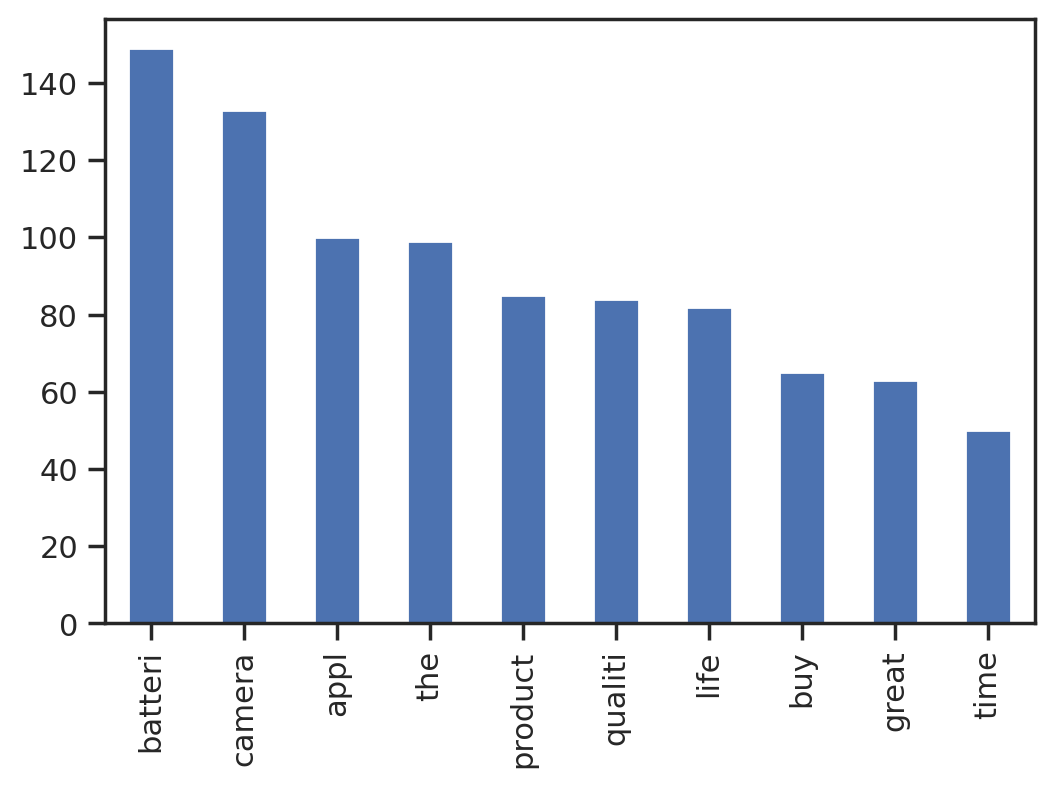

In [ ]:
# sns.countplot(pd.Series(answer_sorted))
answer_sorted.head(10).plot.bar()

In [ ]:
#Remove the
answer_sorted.drop(answer_sorted.index[3],inplace=True)

In [ ]:
px.bar(answer_sorted.head(10),title="Top Amazon Review words - iPhone 13")

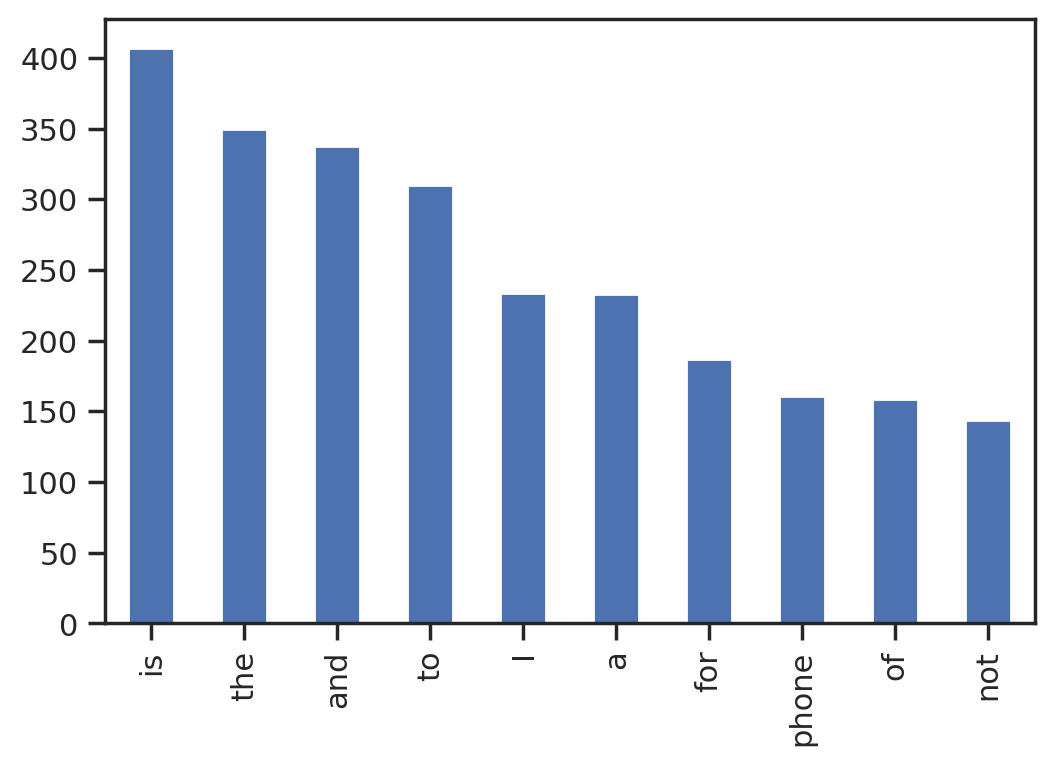

In [ ]:
answer_sorted_2 = pd.Series(answer_sorted_2)
answer_sorted_2.drop(answer_sorted_2.index[0],inplace=True)
# sns.countplot(pd.Series(answer_sorted_2))
answer_sorted_2.head(10).plot.bar()

In [ ]:
import plotly.express as px

In [ ]:
px.bar(answer_sorted_2.head(10))